In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip -qqq install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [4]:
import openai
import os
from google.colab import userdata
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

OPENAI_API_KEY=userdata.get('OPENAI')
import os
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [ ]:
import openai
import os
from google.colab import userdata
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

OPENAI_API_KEY=userdata.get('OPENAI')
import os
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/FinancialPhraseBank/Sentences_AllAgree.txt', delimiter='@', names=['News Headline', 'Sentiment'], encoding='ISO-8859-1')

# Select 60 samples (20 positive, 20 negative, 20 neutral)
samples = pd.concat([
    df[df['Sentiment'] == 'positive'].sample(20),
    df[df['Sentiment'] == 'negative'].sample(20),
    df[df['Sentiment'] == 'neutral'].sample(20)
])

# Function to get prediction from OpenAI GPT
def get_sentiment(text):
    messages = [
        {"role": "system", "content": "Classify the sentiment of the following news headline as positive, negative, or neutral."},
        {"role": "user", "content": text}
    ]
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=10,
        n=1,
        stop=None,
        temperature=0,
    )
    return response.choices[0].message.content.strip().lower()
# Get predictions
samples['Predicted Sentiment'] = samples['News Headline'].apply(get_sentiment)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(samples['Sentiment'], samples['Predicted Sentiment'])
conf_matrix = confusion_matrix(samples['Sentiment'], samples['Predicted Sentiment'])

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9166666666666666
Confusion Matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  4 16]]


In [ ]:
def generate_few_shot_examples(df):
    positive_examples = df[df['Sentiment'] == 'positive'].sample(4)
    negative_examples = df[df['Sentiment'] == 'negative'].sample(4)
    neutral_examples = df[df['Sentiment'] == 'neutral'].sample(4)

    few_shot_examples = "Classify the sentiment of the following news headline:\n"

    for idx, row in positive_examples.iterrows():
        few_shot_examples += f"{idx+1}. {row['News Headline']}@positive\n"

    for idx, row in negative_examples.iterrows():
        few_shot_examples += f"{idx+5}. {row['News Headline']}@negative\n"

    for idx, row in neutral_examples.iterrows():
        few_shot_examples += f"{idx+9}. {row['News Headline']}@neutral\n"

    return few_shot_examples

# Generate few-shot examples
few_shot_examples = generate_few_shot_examples(df)

# Function to get prediction from OpenAI GPT with few-shot prompting
def get_few_shot_sentiment(text, few_shot_examples):
    messages = [
        {"role": "system", "content": few_shot_examples},
        {"role": "user", "content": f"{text} Sentiment:"}
    ]
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=10,
        n=1,
        stop=None,
        temperature=0,
    )
    return response.choices[0].message.content.strip().lower()


samples = pd.concat([
    df[df['Sentiment'] == 'positive'].sample(20),
    df[df['Sentiment'] == 'negative'].sample(20),
    df[df['Sentiment'] == 'neutral'].sample(20)
])

# Get few-shot predictions
samples['Few-Shot Predicted Sentiment'] = samples['News Headline'].apply(lambda x: get_few_shot_sentiment(x, few_shot_examples))

# Calculate accuracy and confusion matrix
few_shot_accuracy = accuracy_score(samples['Sentiment'], samples['Few-Shot Predicted Sentiment'])
few_shot_conf_matrix = confusion_matrix(samples['Sentiment'], samples['Few-Shot Predicted Sentiment'])

# Print the rows along with the sentiment analysis
for idx, row in samples.iterrows():
    print(f"News Headline: {row['News Headline']}")
    print(f"Actual Sentiment: {row['Sentiment']}")
    print(f"Predicted Sentiment: {row['Few-Shot Predicted Sentiment']}")
    print("\n")

print(f'Few-Shot Accuracy: {few_shot_accuracy}')
print(f'Few-Shot Confusion Matrix:\n{few_shot_conf_matrix}')

News Headline: For Q2 2010 , consolidated earnings before tax totaled EUR4 .5 m , compared to EUR3 .9 m , and net profit was EUR3 .2 m , compared to EUR2 .9 m in the previous year .
Actual Sentiment: positive
Predicted Sentiment: positive


News Headline: In January-September 2007 , Finnlines ' net sales rose to EUR 505.4 mn from EUR 473.5 mn in the corresponding period in 2006 .
Actual Sentiment: positive
Predicted Sentiment: positive


News Headline: 20 October 2010 - Finnish metal products company Componenta Oyj HEL : CTH1V said yesterday that its net loss narrowed to EUR7m for the first nine months of 2010 from EUR23 .3 m for the same period of 2009 .
Actual Sentiment: positive
Predicted Sentiment: positive


News Headline: Operating profit rose to EUR 103.4 mn from EUR 23.2 in the corresponding period in 2006 .
Actual Sentiment: positive
Predicted Sentiment: positive


News Headline: This resulted in improved sales figures in Sweden .
Actual Sentiment: positive
Predicted Sentiment

In [ ]:
import pandas as pd

# Load datasets with specified encoding
all_agree_df = pd.read_csv('/content/drive/My Drive/FinancialPhraseBank/Sentences_AllAgree.txt', delimiter='@', names=['News Headline', 'Sentiment'], encoding='ISO-8859-1')
seventy_five_agree_df = pd.read_csv('/content/drive/My Drive/FinancialPhraseBank/Sentences_75Agree.txt', delimiter='@', names=['News Headline', 'Sentiment'], encoding='ISO-8859-1')

# Combine datasets
df = pd.concat([all_agree_df, seventy_five_agree_df])

# Encode labels
label_map = {'positive': 'positive', 'neutral': 'neutral', 'negative': 'negative'}
df['Sentiment'] = df['Sentiment'].map(label_map)

# Select 150 samples for each sentiment
positive_samples = df[df['Sentiment'] == 'positive'].sample(n=150, random_state=42)
negative_samples = df[df['Sentiment'] == 'negative'].sample(n=150, random_state=42)
neutral_samples = df[df['Sentiment'] == 'neutral'].sample(n=150, random_state=42)

# Combine samples for fine-tuning
fine_tuning_data = pd.concat([positive_samples, negative_samples, neutral_samples])
fine_tuning_data.to_csv('fine_tuning_data.csv', index=False)

print("Fine-tuning data prepared. Distribution of sentiments:")
print(fine_tuning_data['Sentiment'].value_counts())


# Remove fine-tuning samples from the original dataframe
remaining_df = df.drop(fine_tuning_data.index)

# Randomly select 500 new news items from the remaining dataset
test_samples = remaining_df.sample(n=500, random_state=42)
test_samples.to_csv('fine_tuning_test.csv', index=False)

print("Test data prepared. Distribution of sentiments:")
print(test_samples['Sentiment'].value_counts())


Fine-tuning data prepared. Distribution of sentiments:
Sentiment
positive    150
negative    150
neutral     150
Name: count, dtype: int64
Test data prepared. Distribution of sentiments:
Sentiment
neutral     322
positive    121
negative     57
Name: count, dtype: int64


In [ ]:
import pandas as pd
import json

# Load the fine-tuning data
fine_tuning_data = pd.read_csv('fine_tuning_data.csv')

# Convert the data to JSONL format for chat models
jsonl_file_path = 'fine_tuning_data_chat.jsonl'

with open(jsonl_file_path, 'w') as jsonl_file:
    for _, row in fine_tuning_data.iterrows():
        record = {
            "messages": [
                {"role": "system", "content": "You are a helpful assistant that classifies the sentiment of news headlines."},
                {"role": "user", "content": str(row['News Headline'])},
                {"role": "assistant", "content": str(row['Sentiment'])}
            ]
        }
        jsonl_file.write(json.dumps(record) + '\n')

print(f"Fine-tuning data has been saved as {jsonl_file_path}")


Fine-tuning data has been saved as fine_tuning_data_chat.jsonl


In [ ]:
import pandas as pd
import json

# Load the CSV file
file_path = 'fine_tuning_data.csv'
df = pd.read_csv(file_path)

# Ensure the dataset has the expected structure
assert 'News Headline' in df.columns and 'Sentiment' in df.columns, "CSV must contain 'News Headline' and 'Sentiment' columns"

# Sample 150 titles for each sentiment for fine-tuning
sample_per_category = 150
fine_tuning_data = df.groupby('Sentiment').apply(lambda x: x.sample(n=sample_per_category, random_state=42)).reset_index(drop=True)

# Convert the fine-tuning data to JSONL format
jsonl_file_path = 'fine_tuning_data.jsonl'

with open(jsonl_file_path, 'w') as jsonl_file:
    for _, row in fine_tuning_data.iterrows():
        record = {
            "messages": [
                {"role": "system", "content": "You are a helpful assistant to determine the sentiment of a news headline."},
                {"role": "user", "content": str(row['News Headline'])},
                {"role": "assistant", "content": str(row['Sentiment'])}
            ]
        }
        jsonl_file.write(json.dumps(record) + '\n')

print(f"Fine-tuning data has been saved as {jsonl_file_path}")

Fine-tuning data has been saved as fine_tuning_data.jsonl


In [ ]:
with open('fine_tuning_data.jsonl', 'rb') as file:
    result = openai.files.create(
        file=file,
        purpose='fine-tune'
    )

# Get the file ID
file_id = result.id
print(f"File ID: {file_id}")

# Fine-tune the model
fine_tune_response = openai.fine_tuning.jobs.create(
    training_file=file_id,
    model="gpt-3.5-turbo"
)

fine_tune_id = fine_tune_response.id
print(f"Fine-tuning job created with ID: {fine_tune_id}")

File ID: file-kOrx0IkuO1PqPr7mBETsatr8
Fine-tuning job created with ID: ftjob-DyFPG9XxLzCTG4XwPmJ5YAme


In [ ]:
# List all fine-tuning jobs to check the status
fine_tune_jobs = openai.fine_tuning.jobs.list()

for job in fine_tune_jobs.data:
    print(f"Job ID: {job.id}, Status: {job.status}")

Job ID: ftjob-DyFPG9XxLzCTG4XwPmJ5YAme, Status: succeeded
Job ID: ftjob-l5N12L647eobyaPhoDFI1X3W, Status: failed
Job ID: ftjob-vbPr0JMzjnzBf58IBWXIV3Wl, Status: failed
Job ID: ftjob-Imfx9U97VjODYs2IiKiRFVel, Status: failed
Job ID: ftjob-etreNyZl5J7E1aYLUt3QraAX, Status: failed
Job ID: ftjob-e8G66n1B5xZxyXAxakS3TskR, Status: failed
Job ID: ftjob-rwA6quQ4CRdEA2JbT7GRo93A, Status: cancelled
Job ID: ftjob-vQymFSGTMred0vX1UUk0BYVf, Status: cancelled
Job ID: ftjob-TOLvyK0xSyaK8bsmIpA2jV4F, Status: failed
Job ID: ftjob-nyM3GHwrlTJIG3Rg6UTDuHkn, Status: failed
Job ID: ftjob-g4RZ4DAKdrZNiiyPpkcacYC4, Status: failed


In [ ]:
# Load the test data
test_file_path = 'fine_tuning_test.csv'
test_df = pd.read_csv(test_file_path)

# Ensure the dataset has the expected structure
assert 'News Headline' in test_df.columns and 'Sentiment' in test_df.columns, "CSV must contain 'News Headline' and 'Sentiment' columns"

# Function to classify sentiment using the fine-tuned model
def classify_headline(prompt):
    response = openai.chat.completions.create(
        model="ft:gpt-3.5-turbo-0125:personal::9hht0gr2",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies the sentiment of news headlines."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=10,
        temperature=0
    )
    return response.choices[0].message.content.strip().lower()

# Prepare the test samples
test_samples = [{"prompt": f"News Headline: {row['News Headline']}\nSentiment: "} for _, row in test_df.iterrows()]

# Make predictions on the test data using the classify_headline function
predicted_sentiments = [classify_headline(sample["prompt"]) for sample in test_samples]

# List of correct sentiments for the test samples
correct_sentiments = test_df['Sentiment'].tolist()

# Compare predicted sentiments with correct sentiments
test_df['Predicted Sentiment'] = predicted_sentiments
test_df['Correct'] = test_df['Predicted Sentiment'] == test_df['Sentiment']

# Calculate accuracy
def calculate_accuracy(df):
    correct_predictions = df['Correct'].sum()
    total_predictions = len(df)
    return correct_predictions / total_predictions

accuracy = calculate_accuracy(test_df)

print(f"Base Accuracy: {accuracy * 100:.2f}%")

# Write predictions and results to a CSV file
output_file_path = 'fine_tuning_results.csv'
test_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


Base Accuracy: 94.00%
Results saved to fine_tuning_results.csv


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
preds = test_df['Predicted Sentiment'].tolist()
actuals = test_df['Sentiment'].tolist()

conf_matrix = confusion_matrix(actuals, preds)
accuracy = accuracy_score(actuals, preds)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
[[ 57   0   0]
 [  4 298  20]
 [  0   6 115]]
Accuracy: 94.00%


Confusion Matrix:
[[ 57   0   0]
 [  4 298  20]
 [  0   6 115]]
Accuracy: 94.00%


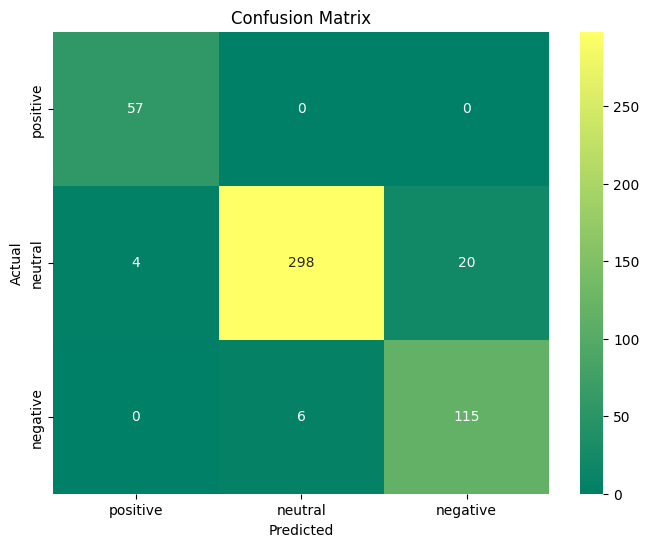

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
preds = test_df['Predicted Sentiment'].tolist()
actuals = test_df['Sentiment'].tolist()

conf_matrix = confusion_matrix(actuals, preds)
accuracy = accuracy_score(actuals, preds)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

labels = ['positive', 'neutral', 'negative']
plot_confusion_matrix(conf_matrix, labels)


In [43]:
headlines_with_sentiments = [
    {"headline": "Microsoft and Apple have opted not to join OpenAI's board, highlighting concerns about potential conflicts of interest and governance challenges.", "sentiment": "Negative"},
    {"headline": "Morgan Stanley is optimistic about Tesla's energy storage business, which has posted its highest quarterly deployment and record profit margins, seeing it as a significant growth area beyond EVs.", "sentiment": "Positive"},
    {"headline": "Analysts predict NVIDIA might reach a $3 trillion market cap due to its dominant position in AI and continued growth in data centers, gaming, and professional visualization markets.", "sentiment": "Positive"},
    {"headline": "Amazon has introduced its Graviton4 chip, designed to enhance performance and efficiency for its AWS cloud services, as competition in the cloud computing space intensifies.", "sentiment": "Positive"},
    {"headline": "Though the company has reached a milestone with its 737 MAX deliveries,Boeing's aircraft deliveries have declined year-over-year ", "sentiment": "Negative"},
    {"headline": "Taiwan Semiconductor Manufacturing Company (TSMC) has surpassed its sales expectations for June, driven by strong demand for its advanced chip technologies, crucial for various high-tech industries.", "sentiment": "Positive"},
    {"headline": "Goldman Sachs analysts argue that current market conditions present an excellent opportunity to buy stocks, citing favorable economic indicators and potential for growth in various sectors.", "sentiment": "Positive"},
    {"headline": "The price of Bitcoin (BTC) has started to fall, but market indicators show a neutral sentiment among traders, suggesting neither a strong bullish nor bearish outlook in the near term.", "sentiment": "Neutral"},
    {"headline": "Germany's interior ministry has proposed limiting the use of Huawei's equipment in the country's 5G network due to security concerns, while telecom operators express their reliance on Huawei's technology.", "sentiment": "Negative"},
    {"headline": "Oracle has launched new advancements in safety case management to help healthcare organizations streamline processes, enhance patient safety, and comply with regulatory requirements.", "sentiment": "Positive"},
    {"headline": "Uber's stock falls 14% to a 52-week low, raising concerns about the company's performance and future prospects.", "sentiment": "Negative"}
]

In [44]:

def classify_headline(prompt):
    response = openai.chat.completions.create(
        model="ft:gpt-3.5-turbo-0125:personal::9hht0gr2",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies the sentiment of news headlines."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=10,
        temperature=0
    )
    return response.choices[0].message.content.strip().lower()

# Get predictions for each headline
for item in headlines_with_sentiments:
    item['predicted_sentiment'] = classify_headline(f"News Headline: {item['headline']}\nSentiment: ")

# Compare predicted sentiments with actual sentiments
correct_predictions = 0

for item in headlines_with_sentiments:
    print(f"News Headline: {item['headline']}")
    print(f"Actual Sentiment: {item['sentiment']}")
    print(f"Predicted Sentiment: {item['predicted_sentiment']}")
    print("\n")

    if item['sentiment'].lower() == item['predicted_sentiment']:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(headlines_with_sentiments)
print(f"Accuracy: {accuracy * 100:.2f}%")

News Headline: Microsoft and Apple have opted not to join OpenAI's board, highlighting concerns about potential conflicts of interest and governance challenges.
Actual Sentiment: Negative
Predicted Sentiment: negative


News Headline: Morgan Stanley is optimistic about Tesla's energy storage business, which has posted its highest quarterly deployment and record profit margins, seeing it as a significant growth area beyond EVs.
Actual Sentiment: Positive
Predicted Sentiment: positive


News Headline: Analysts predict NVIDIA might reach a $3 trillion market cap due to its dominant position in AI and continued growth in data centers, gaming, and professional visualization markets.
Actual Sentiment: Positive
Predicted Sentiment: positive


News Headline: Amazon has introduced its Graviton4 chip, designed to enhance performance and efficiency for its AWS cloud services, as competition in the cloud computing space intensifies.
Actual Sentiment: Positive
Predicted Sentiment: positive


News H